Importing Crime and Housing DataSet


In [1]:
import csv
import numpy as np
from numpy import linalg as LA
from numpy.linalg import eig
import matplotlib.pyplot as plt


reader = csv.reader(open("train-crime.csv", "r"), delimiter=",")
x = list(reader)
train_crime = np.array(x).astype("float")

reader = csv.reader(open("test-crime.csv", "r"), delimiter=",")
x = list(reader)
test_crime = np.array(x).astype("float")

reader = csv.reader(open("train-housing.csv", "r"), delimiter=",")
x = list(reader)
train_housing = np.array(x).astype("float")

reader = csv.reader(open("test-housing.csv", "r"), delimiter=",")
x = list(reader)
test_housing = np.array(x).astype("float")



In [2]:
reader = csv.reader(open("trainR-crime.csv", "r"), delimiter=",")
x = list(reader)
trainR_crime = np.array(x).astype("float")

reader = csv.reader(open("testR-crime.csv", "r"), delimiter=",")
x = list(reader)
testR_crime = np.array(x).astype("float")

reader = csv.reader(open("trainR-housing.csv", "r"), delimiter=",")
x = list(reader)
trainR_housing = np.array(x).astype("float")

reader = csv.reader(open("testR-housing.csv", "r"), delimiter=",")
x = list(reader)
testR_housing = np.array(x).astype("float")


In [3]:
print(f"train crime: {train_crime.shape}")
print(f"test crime: {test_crime.shape}")
print(f"train housing: {train_housing.shape}")
print(f"test housing: {test_housing.shape}")


train crime: (1695, 100)
test crime: (298, 100)
train housing: (102, 13)
test housing: (404, 13)


In [4]:
print(f"trainR crime: {trainR_crime.shape}")
print(f"testR crime: {testR_crime.shape}")
print(f"trainR housing: {trainR_housing.shape}")
print(f"testR housing: {testR_housing.shape}")


trainR crime: (1695, 1)
testR crime: (298, 1)
trainR housing: (102, 1)
testR housing: (404, 1)


Fuction to calculate MSE using MLE

In [5]:
def call_1(train,trainR,test,testR,mse):
      w=np.matmul(np.linalg.inv(np.matmul(np.transpose(train),train)),np.matmul(np.transpose(train),trainR))
      d=pow((LA.norm(np.matmul(test,w)-testR)),2)/test.shape[0]
      mse.append(d)


Funtion to calculate optimal alpha and beta and Mean Squared Error(Through Model Selection)

In [6]:
def call(alpha,beta,train,trainR,test,testR,mse,alpha_beta,labda):
    
      
      for i in range(1000):
        #calculation s_n
        s_n=np.linalg.inv(alpha*(np.identity(np.matmul(np.transpose(train),train).shape[0]))+beta*(np.matmul(np.transpose(train),train)))
        s_n1=beta*(np.matmul(np.transpose(train),train))
        #calculting m_n
        l=beta*(np.matmul(np.transpose(train),trainR))
        m_n=np.matmul(s_n,l)
        #calculate gamma
        gamma=0
        eigenvalue,eigenvector=eig(s_n1)
        for i in (eigenvalue):
          gamma+=i/(i+alpha)
        alpha0=gamma/(np.matmul(np.transpose(m_n),m_n))
        temp= pow( (LA.norm(np.matmul(train,m_n)-trainR)),2   )/  (train.shape[0]-gamma)
        beta0=1/temp
        if( abs(alpha-alpha0)<=1.e-9  and abs(beta-beta0)<=1.e-9):
          alpha=alpha0
          beta=beta0
          break
        alpha=alpha0  
        beta=beta0
      tmp=[]
      tmp.append(alpha)
      tmp.append(beta)
      alpha_beta.append(tmp)
      labda.append(alpha/beta)
      w=np.matmul(np.linalg.inv( (alpha/beta)*np.identity(np.matmul(np.transpose(train),train).shape[0])+np.matmul(np.transpose(train),train)),np.matmul(np.transpose(train),trainR))
      d=pow( (LA.norm(np.matmul(test,w)-testR)),2)/test.shape[0]
      mse.append(d)

        

Crime DataSet

In [7]:
l=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
crime_mse=[]
crime_mse_mle=[]
crime_alpha_beta=[]
crime_labda=[]
alpha=1
beta=2
test=test_crime
testR=testR_crime 
      
for i in l:
   train=train_crime[0:int(1695*i)]
   trainR=trainR_crime[0:int(1695*i)]
   call(alpha,beta,train,trainR,test,testR,crime_mse,crime_alpha_beta,crime_labda)
   call_1(train,trainR,test,testR,crime_mse_mle) 

print("Mse of crime:" ,crime_mse)
print("Alpha and beta of crime", crime_alpha_beta)
print("Lamda of crime", crime_labda)
print("Mse of crime based on MLE",crime_mse_mle)

Mse of crime: [0.3973494907413788, 0.34524717509174735, 0.348260893381907, 0.33788160770365855, 0.33870075016906936, 0.3328208252165132, 0.3307765464098719, 0.33244627574137914, 0.3324735359429325, 0.3345435839841052]
Alpha and beta of crime [[array([[188.13444157]]), array([[3.05906022]])], [array([[284.72212468]]), array([[2.96441872]])], [array([[266.9905617]]), array([[2.84715233]])], [array([[280.449113]]), array([[2.84968436]])], [array([[284.08793524]]), array([[2.915622]])], [array([[263.47598344]]), array([[2.96226148]])], [array([[254.16216348]]), array([[3.08756079]])], [array([[254.20727982]]), array([[3.12419584]])], [array([[247.43785802]]), array([[3.0462555]])], [array([[239.71675396]]), array([[3.08529804]])]]
Lamda of crime [array([[61.50073155]]), array([[96.04652777]]), array([[93.77459666]]), array([[98.41409711]]), array([[97.43647661]]), array([[88.94420209]]), array([[82.31810826]]), array([[81.36726784]]), array([[81.2268892]]), array([[77.69646598]])]
Mse of c

10


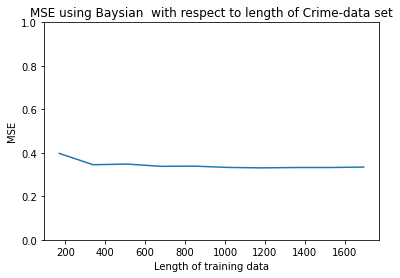

In [8]:
plt.title("MSE using Baysian  with respect to length of Crime-data set")
plt.xlabel("Length of training data")
plt.ylabel("MSE")

X=[1695*i for i in l]
print(len(crime_mse))

plt.ylim(0, 1)
plt.plot(X,crime_mse)

10


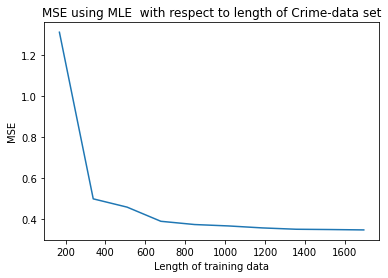

In [10]:
plt.title("MSE using MLE  with respect to length of Crime-data set")
plt.xlabel("Length of training data")
plt.ylabel("MSE")

X=[1695*i for i in l]
print(len(crime_mse_mle))

plt.plot(X,crime_mse_mle)

Housing DataSet

In [15]:
d=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
housing_mse=[]
housing_mse_mle=[]
housing_alpha_beta=[]
housing_labda=[]
alpha=6
beta=7
test=test_housing
testR=testR_housing 
   
for i in d:
   train=train_housing[0:int(102*i)]
   trainR=trainR_housing[0:int(102*i)]
   call(alpha,beta,train,trainR,test,testR,housing_mse,housing_alpha_beta,housing_labda)
   call_1(train,trainR,test,testR,housing_mse_mle)

print("Mse of Housing:" ,housing_mse)
print("Alpha and beta of housing", housing_alpha_beta)
print("Lamda of housing", housing_labda)
print("Mse of housing based on MLE",housing_mse_mle)

Mse of Housing: [0.4739323274418546, 0.3178536411920829, 0.3152250234220969, 0.3086490303120302, 0.32089197585324153, 0.29966188672329214, 0.2942474945340388, 0.2872878784404555, 0.30265063472580345, 0.2884936224270277]
Alpha and beta of housing [[array([[17.11589264-6.48698753e-30j]]), array([[55.42997019-1.65974726e-29j]])], [array([[16.33475216]]), array([[3.45860223]])], [array([[17.04712647]]), array([[4.11444631]])], [array([[18.40616287]]), array([[4.9746028]])], [array([[17.80874271]]), array([[4.41151738]])], [array([[19.53649703]]), array([[4.69127369]])], [array([[18.64262721]]), array([[4.39349693]])], [array([[19.27325847]]), array([[4.54984526]])], [array([[16.95087865]]), array([[4.11960031]])], [array([[20.41249709]]), array([[4.04125484]])]]
Lamda of housing [array([[0.30878409-2.45706814e-32j]]), array([[4.72293461]]), array([[4.14323707]]), array([[3.70002664]]), array([[4.03687466]]), array([[4.16443344]]), array([[4.2432321]]), array([[4.23602505]]), array([[4.1146

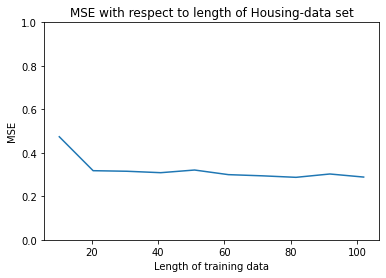

In [12]:
plt.title("MSE with respect to length of Housing-data set")
plt.xlabel("Length of training data")
plt.ylabel("MSE")

X=[102*i for i in d]
plt.ylim(0, 1)
plt.plot(X,housing_mse)

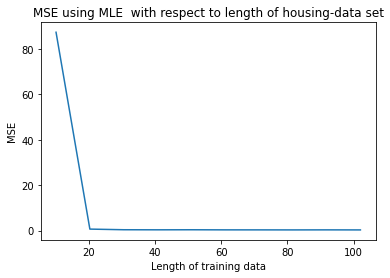

In [16]:
plt.title("MSE using MLE  with respect to length of housing-data set")
plt.xlabel("Length of training data")
plt.ylabel("MSE")

X=[102*i for i in d]

plt.plot(X,housing_mse_mle)

Calculation of MSE with given lambda

In [10]:
def callfor2(train,trainR,test,testR,crime_mse,labda):
      w=np.matmul(np.linalg.inv(labda*np.identity(np.matmul(np.transpose(train),train).shape[0])+np.matmul(np.transpose(train),train)),np.matmul(np.transpose(train),trainR))
      d=pow( (LA.norm(np.matmul(test,w)-testR)),2)/test.shape[0]
      crime_mse.append(d)

        

In [49]:
#crime data
l=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
m=[1.0,33.0,100.0,1000.0]
mse=[]
for j in m:
  crime2_mse=[]
  for i in l:
    train=train_crime[0:int(1695*i)]
    trainR=trainR_crime[0:int(1695*i)]
    test=test_crime
    testR=testR_crime 
    callfor2(train,trainR,test,testR,crime2_mse,j)
  mse.append(crime2_mse)
print("MSE of crime with different lambda",np.array(mse))        

MSE of crime with different lambda [[0.69159992 0.46291459 0.43913107 0.38073611 0.36831738 0.3620302
  0.35245425 0.34721311 0.34597045 0.34476208]
 [0.41445045 0.36721973 0.37007751 0.35036751 0.34949274 0.34215209
  0.33776025 0.33791258 0.33738615 0.3385348 ]
 [0.38695807 0.34464195 0.34721775 0.33772147 0.33845285 0.3318064
  0.32935117 0.33113616 0.33123333 0.33318515]
 [0.35175695 0.33083123 0.327807   0.32228036 0.3232175  0.31949499
  0.31914335 0.31970293 0.31927058 0.32042423]]


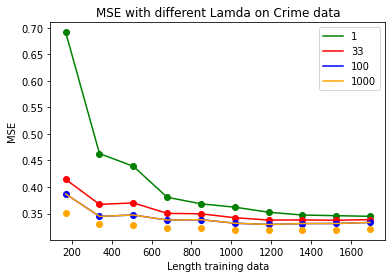

In [14]:
x=[1695*i for i in l]
y1 =mse[0] 
y2=mse[1]
y3=mse[2]
y4=mse[3]
plt.scatter(x, y1, color='green')
plt.scatter(x, y2, color='red')
plt.scatter(x, y3, color='blue')
plt.scatter(x,y4,color='orange')

# Scatter Plot color array
plt.title("MSE with different Lamda on Crime data")

plt.xlabel("Length training data")
plt.ylabel("MSE")


# Display
plt.plot(x,y1,color='green')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='blue')
plt.plot(x,y3,color='orange')
plt.legend(['1', '33','100','1000'])
plt.show()




In [50]:
#housing data set
l=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
m=[1.0,33.0,100.0,1000.0]
mse=[]
test=test_housing
testR=testR_housing 
    
for j in m:
  housing2_mse=[]
  for i in l:
    train=train_housing[0:int(102*i)]
    trainR=trainR_housing[0:int(102*i)]
    callfor2(train,trainR,test,testR,housing2_mse,j)
  mse.append(housing2_mse)
print("MSE of crime with different lambda",np.array(mse))        

MSE of crime with different lambda [[0.42356667 0.3643471  0.33488218 0.32370903 0.34656788 0.31213502
  0.30649309 0.29435854 0.31378035 0.29243563]
 [0.62289381 0.43120043 0.36167733 0.34742199 0.35352782 0.33658551
  0.31340188 0.3098098  0.30736709 0.30544117]
 [0.75284682 0.58603064 0.49677326 0.46652408 0.46523222 0.43991055
  0.39273853 0.38715888 0.37023733 0.3681112 ]
 [0.95372784 0.90093428 0.86458057 0.83512352 0.81218873 0.78457641
  0.73803477 0.7296996  0.71300838 0.70197014]]


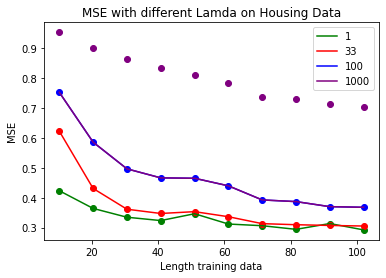

In [22]:
x=[102*i for i in l]
y1 =mse[0] 
y2=mse[1]
y3=mse[2]
y4=mse[3]
plt.scatter(x, y1, color='green')
plt.scatter(x, y2, color='red')
plt.scatter(x, y3, color='blue')
plt.scatter(x,y4,color='purple')

# Scatter Plot color array
plt.title("MSE with different Lamda on Housing Data")

plt.xlabel("Length training data")
plt.ylabel("MSE")


# Display
plt.plot(x,y1,color='green')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='blue')
plt.plot(x,y3,color='purple')
plt.legend(['1', '33','100','1000'])
plt.show()




Task 2


In [23]:
reader = csv.reader(open("train-f3.csv", "r"), delimiter=",")
x = list(reader)
train_f3 = np.array(x).astype("float")

reader = csv.reader(open("test-f3.csv", "r"), delimiter=",")
x = list(reader)
test_f3 = np.array(x).astype("float")

reader = csv.reader(open("train-f5.csv", "r"), delimiter=",")
x = list(reader)
train_f5 = np.array(x).astype("float")

reader = csv.reader(open("test-f5.csv", "r"), delimiter=",")
x = list(reader)
test_f5 = np.array(x).astype("float")




In [24]:
reader = csv.reader(open("trainR-f3.csv", "r"), delimiter=",")
x = list(reader)
trainR_f3 = np.array(x).astype("float")

reader = csv.reader(open("testR-f3.csv", "r"), delimiter=",")
x = list(reader)
testR_f3 = np.array(x).astype("float")

reader = csv.reader(open("trainR-f5.csv", "r"), delimiter=",")
x = list(reader)
trainR_f5 = np.array(x).astype("float")

reader = csv.reader(open("testR-f5.csv", "r"), delimiter=",")
x = list(reader)
testR_f5 = np.array(x).astype("float")


In [25]:
print(f"train f3: {train_f3.shape}")
print(f"test f3: {test_f3.shape}")
print(f"train f5: {train_f5.shape}")
print(f"test f5: {test_f5.shape}")


train f3: (300, 1)
test f3: (500, 1)
train f5: (300, 1)
test f5: (500, 1)


In [26]:
print(f"trainR f3: {trainR_f3.shape}")
print(f"testR f3: {testR_f3.shape}")
print(f"trainR f5: {trainR_f5.shape}")
print(f"testR f5: {testR_f5.shape}")


trainR f3: (300, 1)
testR f3: (500, 1)
trainR f5: (300, 1)
testR f5: (500, 1)


Fuction to generate the polynomial data-set

In [27]:
def generate(data,d):
   ans=[]
     
   for i in data:
     x=[]
     for j in range(d+1):
       x.append(pow(i,j))
     ans.append(x)
    
   return np.array(ans).reshape(data.shape[0],d+1)
     
    


Function to calculate MSe, log Evedence and optimal alpha and beta(Bayesian/regularized appraoch)

In [128]:
def call3(alpha,beta,train,trainR,test,testR,mse,alpha_beta,labda,evidence):
      while(True):
        #calculation s_n
        s_n=np.linalg.inv(alpha*(np.identity(np.matmul(np.transpose(train),train).shape[0]))+beta*(np.matmul(np.transpose(train),train)))
        s_n1=beta*(np.matmul(np.transpose(train),train))
        #calculting m_n
        l=beta*(np.matmul(np.transpose(train),trainR))
        m_n=np.matmul(s_n,l)
        #calculate gamma
        gamma=0
        eigenvalue,eigenvector=eig(s_n1)
        for i in (eigenvalue):
          gamma+=i/(i+alpha)
        alpha0=gamma/(np.matmul(np.transpose(m_n),m_n))
        temp= pow( (LA.norm(np.matmul(train,m_n)-trainR)),2   )/  (train.shape[0]-gamma)
        beta0=1/temp
        if( abs(alpha-alpha0)<=.00005  and abs(beta-beta0)<=.00005):
          alpha=alpha0
          beta=beta0
          break
        alpha=alpha0  
        beta=beta0
      tmp=[]
      tmp.append(alpha)
      tmp.append(beta)
      alpha_beta.append(tmp)
      labda.append(alpha/beta)
      w=np.matmul(np.linalg.inv( (alpha/beta)*np.identity(np.matmul(np.transpose(train),train).shape[0])+np.matmul(np.transpose(train),train)),np.matmul(np.transpose(train),trainR))
      d=pow( (LA.norm(np.matmul(test,w)-testR)),2)/test.shape[0]
      mse.append(d)
      tmp2=[]
      tmp2.append( np.dot((w.shape[0]/2),np.log(alpha)) + np.dot((train.shape[0]/2),np.log(beta))  - np.dot((train.shape[0]/2),np.log(2*3.14)) -  np.dot( (alpha/2), np.dot(np.transpose(m_n),m_n)) - np.dot( (beta/2),pow( (LA.norm(trainR-np.dot(train,m_n))),2)) - np.dot((1/2),np.log(np.linalg.det(np.linalg.inv(s_n))) ))
      
      evidence.append(tmp2)
        

Unregularized MSE

In [129]:
def call4(train,trainR,test,testR,mse):
      w=np.matmul(np.linalg.inv(np.matmul(np.transpose(train),train)),np.matmul(np.transpose(train),trainR))
      d=pow((LA.norm(np.matmul(test,w)-testR)),2)/test.shape[0]
      mse.append(d)


For F3-Data

In [130]:
d=[1,2,3,4,5,6,7,8,9,10]
f3_mse=[]
f3_alpha_beta=[]
f3_labda=[]
f3_evidence=[]
f3_mse_nonregu=[]
alpha=6
beta=7
trainR=trainR_f3
testR=testR_f3 
for i in d:
   train=generate(train_f3,i)
   test=generate(test_f3,i)
   call3(alpha,beta,train,trainR,test,testR,f3_mse,f3_alpha_beta,f3_labda,f3_evidence)
   call4(train,trainR,test,testR,f3_mse_nonregu)
print(f"MSE of f3: {f3_mse}")
print(f"alpha beta of f3: {f3_alpha_beta}")
print(f"Lambda of f3: {f3_labda}")
print(f"Evidence of f3:{f3_evidence}")
print(f"MSE for unregularized f3:{f3_mse_nonregu}")

MSE of f3: [39376476.15867189, 39527145.98303755, 67746.73068694868, 149527.91797484685, 152228.99961742683, 165090.40426476675, 172102.90062299275, 181621.79886404693, 179042.4389755561, 219685.20432604046]
alpha beta of f3: [[array([[6.97198993e-07]]), array([[2.62786873e-08]])], [array([[1.04561412e-06]]), array([[2.62139131e-08]])], [array([[0.00998393]]), array([[2.45096392e-07]])], [array([[0.01872897]]), array([[2.48536732e-07]])], [array([[0.02471774]]), array([[2.47897997e-07]])], [array([[0.0290085]]), array([[2.47481921e-07]])], [array([[0.02937365]]), array([[2.48647889e-07]])], [array([[0.03379791]]), array([[2.48242675e-07]])], [array([[0.04474225-7.71390605e-13j]]), array([[2.46669841e-07-1.84071754e-20j]])], [array([[0.05068574+9.3132103e-26j]]), array([[2.46401876e-07-3.56408729e-34j]])]]
Lambda of f3: [array([[26.53096729]]), array([[39.88775414]]), array([[40734.71642014]]), array([[75356.96323649]]), array([[99709.30242893]]), array([[117214.6389812]]), array([[1181

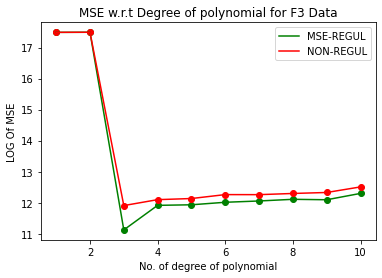

In [131]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y1 = np.log(f3_mse)
y2 = np.log(f3_mse_nonregu)

plt.scatter(x, y1, color='green')
plt.scatter(x, y2, color='red')

# Scatter Plot color array
plt.title("MSE w.r.t Degree of polynomial for F3 Data")

plt.xlabel("No. of degree of polynomial")
plt.ylabel("LOG Of MSE")


# Display
plt.plot(x,y1,color='green')
plt.plot(x,y2,color='red')

plt.legend(['MSE-REGUL', 'NON-REGUL'])
plt.show()




/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


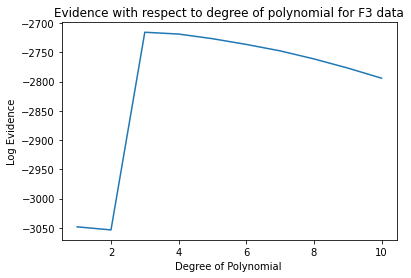

In [132]:
plt.title("Evidence with respect to degree of polynomial for F3 data")
plt.xlabel("Degree of Polynomial ")
plt.ylabel("Log Evidence")

X = np.array([1,2,3,4,5,6,7,8,9,10])
plt.plot(X,np.array(f3_evidence).reshape(10,1))

For F5-Data

In [136]:
Sd=[1,2,3,4,5,6,7,8,9,10]
f5_mse=[]
f5_alpha_beta=[]
f5_labda=[]
f5_evidence=[]
f5_mse_nonregu=[]
alpha=6
beta=7
trainR=trainR_f5
testR=testR_f5 
for i in d:
   train=generate(train_f5,i)
   test=generate(test_f5,i)
   call3(alpha,beta,train,trainR,test,testR,f5_mse,f5_alpha_beta,f5_labda,f5_evidence)
   call4(train,trainR,test,testR,f5_mse_nonregu)
print(f"MSE of f5: {f5_mse}")
print(f"alpha beta of f5: {f5_alpha_beta}")
print(f"Lambda of f5: {f5_labda}")
print(f"Evidence of f5:{f5_evidence}")
print(f"MSE for unregularized f5:{f5_mse_nonregu}")


MSE of f5: [341402522822.16724, 341325173103.92303, 17502036666.041233, 17478865261.765102, 54265.21421216773, 69168.5095548836, 92510.91386388306, 96676.97257943789, 105749.35686983926, 103637.86559875993]
alpha beta of f5: [[array([[1.54380115e-10]]), array([[3.33398859e-12]])], [array([[3.00733407e-10]]), array([[3.34069621e-12]])], [array([[1.22828082e-09]]), array([[6.60264306e-11]])], [array([[1.78627075e-09]]), array([[6.72591406e-11]])], [array([[0.03861713]]), array([[2.35209039e-07]])], [array([[0.05064734]]), array([[2.35587291e-07]])], [array([[0.06878545]]), array([[2.36760433e-07]])], [array([[0.08159545]]), array([[2.36045035e-07]])], [array([[0.09207294]]), array([[2.35704286e-07]])], [array([[0.10415594-4.34163044e-37j]]), array([[2.35300638e-07-1.77403245e-44j]])]]
Lambda of f5: [array([[46.30493214]]), array([[90.0211776]]), array([[18.60286562]]), array([[26.55803711]]), array([[164182.15911567]]), array([[214983.34660093]]), array([[290527.66132706]]), array([[3456

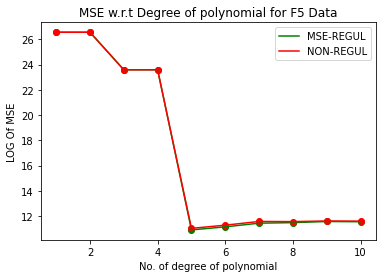

In [134]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y1 = np.log(f5_mse)
y2 = np.log(f5_mse_nonregu)

plt.scatter(x, y1, color='green')
plt.scatter(x, y2, color='red')

# Scatter Plot color array
plt.title("MSE w.r.t Degree of polynomial for F5 Data")

plt.xlabel("No. of degree of polynomial")
plt.ylabel("LOG Of MSE")


# Display
plt.plot(x,y1,color='green')
plt.plot(x,y2,color='red')

plt.legend(['MSE-REGUL', 'NON-REGUL'])
plt.show()




/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


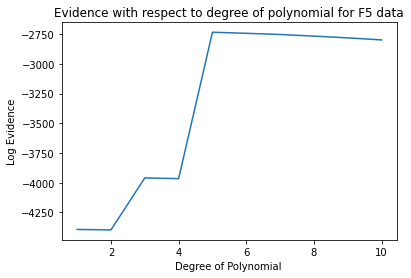

In [135]:
plt.title("Evidence with respect to degree of polynomial for F5 data")
plt.xlabel("Degree of Polynomial ")
plt.ylabel("Log Evidence")

X = np.array([1,2,3,4,5,6,7,8,9,10])
plt.plot(X,np.array(f5_evidence).reshape(10,1))